## 2. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#create data path
path=r'C:\Users\oluwo\Downloads\Gun Violence Project Analysis 2025'

In [4]:
df = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'gun_violence_cleaned.csv'), index_col=False)

In [7]:
df.shape

(239677, 20)

In [6]:
df.head(5)

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,source_url,gun_stolen,gun_type,incident_characteristics,latitude,longitude,n_guns_involved,notes,participant_age_group,participant_gender,participant_status,participant_type
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.post-gazette.com/local/south/2013/0...,Unknown,Unknown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,1,Julian Sims under investigation: Four Shot and...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.dailybulletin.com/article/zz/201301...,Unknown,Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,1,Four Shot; One Killed; Unidentified shooter in...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://chronicle.northcoastnow.com/2013/02/14/...,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,2,Unknown,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.dailydemocrat.com/20130106/aurora-s...,Unknown,Unknown,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,1,Unknown,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.journalnow.com/news/local/article_d...,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,2,Two firearms recovered. (Attempted) murder sui...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...


## 3. Data Cleaning

In [9]:
#drop the column with 'unnamed:0'df.drop(columns=["Unnamed: 0"])
df_2 = df.drop(columns=["Unnamed: 0"]) 

In [11]:
df_2.shape

(239677, 19)

Missing values

In [18]:
#check missing values 
df_2.isnull().sum() #no missing value found

incident_id                 0
date                        0
state                       0
city_or_county              0
address                     0
n_killed                    0
n_injured                   0
source_url                  0
gun_stolen                  0
gun_type                    0
incident_characteristics    0
latitude                    0
longitude                   0
n_guns_involved             0
notes                       0
participant_age_group       0
participant_gender          0
participant_status          0
participant_type            0
dtype: int64

Duplicate check

In [14]:
dups = df_2.duplicated()

In [17]:
dups.shape #no duplicate found 

(239677,)

In [23]:
df_2['incident_id'].nunique()

239677

## Data prep for regression analysis 

**Question 4**  
Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

In [24]:
#for the dependant variable (y), i will be using:  
#Total_victims= n_killed + n_injured.  

#why: because using both n_killed and n_injured variables together Captures overall severity of an incident,  
#and give more information than using killed or injured alone.


df_2['total_victims'] = df_2['n_killed'] + df_2['n_injured']   #add number of killed and injured to use as dependant variable 'y'

In [26]:
df_2['total_victims'].shape

(239677,)

Extreme value check

C:\Users\oluwo\AppData\Local\Temp\ipykernel_26612\2402059214.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['total_victims'], bins=25) # Shows extreme values


<Axes: xlabel='total_victims', ylabel='Density'>

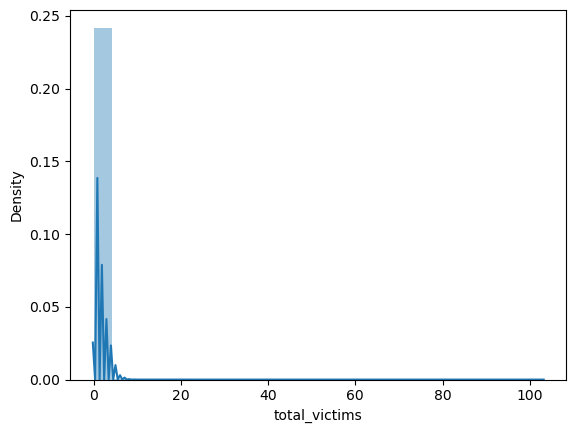

In [28]:
sns.distplot(df_2['total_victims'], bins=25) # Shows extreme values

In [39]:
#check the descriptive statistic
df_2['total_victims'].describe()

count    239677.000000
mean          0.746296
std           0.842343
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max         103.000000
Name: total_victims, dtype: float64

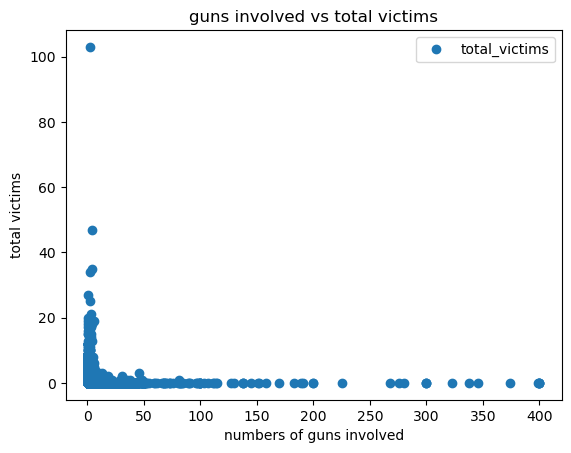

In [57]:
#Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_2.plot(x = 'n_guns_involved', y='total_victims', style='o') #The style option creates a scatterplot; without it, we only have lines.
plt.title('guns involved vs total victims')  
plt.xlabel('numbers of guns involved')  
plt.ylabel('total victims')  
plt.show()

**Question 5**  
State your hypothesis in a markdown cell within your Jupyter notebook.

**Hypothesis**   
Guns involved are associated with victim count

**Question 6**  
Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable

In [40]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_2['n_guns_involved'].values.reshape(-1,1)
y = df_2['total_victims'].values.reshape(-1,1)

In [41]:
X

array([[1],
       [1],
       [2],
       ...,
       [1],
       [1],
       [2]], shape=(239677, 1))

In [42]:
y

array([[4],
       [4],
       [4],
       ...,
       [1],
       [1],
       [2]], shape=(239677, 1))

**Question 7**   
Split the data into two sets: a training set and a test set

In [43]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Question 8**  
Run a linear regression on the data.  

a. First, fit the model you created to the training set.

In [44]:
#Create a regression object.
regression = LinearRegression()

In [45]:
#Fit the regression object onto the training set.
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


8b. Then, create a prediction for y on the test set

In [46]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

**Question 9**  
Create a plot that shows the regression line on the test set.

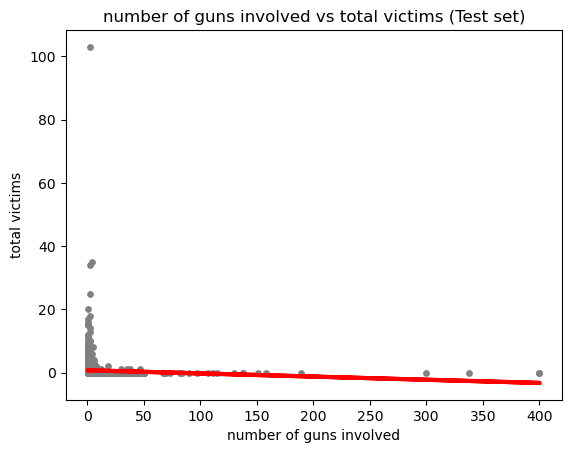

In [47]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('number of guns involved vs total victims (Test set)')
plot_test.xlabel('number of guns involved')
plot_test.ylabel('total victims')
plot_test.show()

**Question 10**  
Write your own interpretation of how well the line appears to fit the data in a markdown cell.
    
The slope is very close to zero and slightly negative.   
The MSE shows that, on average, the model’s predictions are off by less than 1 victim squared.   
The R² value means the model explains only 0.14% of the variation in total victims.   
While this number looks small, it mainly reflects the fact that most incidents have very low victim counts,  
The regression line shows a poor fit to the data. Most incidents cluster around very low numbers of guns involved and low victim counts, while a few extreme outliers stretch the scale. This heavy skew results in an almost flat, slightly downward trend line, indicating little to no linear relationship between the number of guns involved and total victims.

**Question 11**   
Check the model performance statistics MSE and R2 score.

In [48]:
#check model performance
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [49]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01002221]]
Mean squared error:  0.83446715232307
R2 score:  0.0013920200117359949


**Question 12**   
Compare the predicted y values with the actual y values in a dataframe.

In [51]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,0.747849
1,5,0.747849
2,1,0.747849
3,1,0.747849
4,0,0.747849
5,0,0.747849
6,1,0.747849
7,1,0.747849
8,0,0.747849
9,1,0.747849


The model predicts almost the same number of victims (about 0.75) for every incident, even though the actual number ranges from 0 to 5. 
This shows that the model did not learn a real relationship between the number of guns involved and the number of victims. 
It overestimates incidents with few or no victims and underestimates incidents with many victims. 
Overall, the model is mostly predicting the average, not real differences in outcomes,hich means the number of guns involved provides little predictive value.

 Compare how the regression fits the training set

In [52]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train

In [54]:
#check performance
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [55]:
#print model statistic summary
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01002221]]
Mean squared error:  0.6541987384362361
R2 score:  0.0019797957012790413


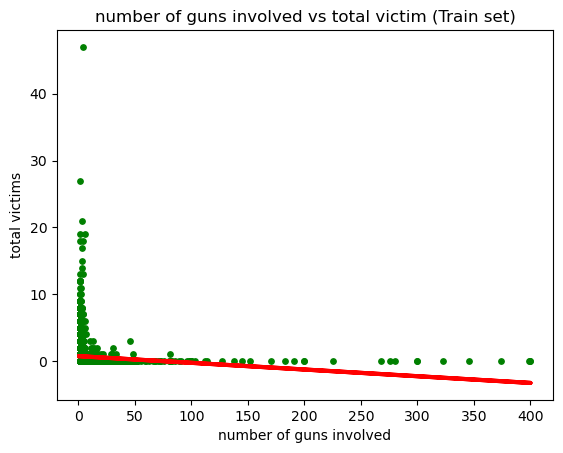

In [56]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('number of guns involved vs total victim (Train set)')
plot_test.xlabel('number of guns involved')
plot_test.ylabel('total victims')
plot_test.show()

The training data shows that most incidents involve very few guns and result in low victim counts, forming a tight cluster near the origin.
A small number of high-victim incidents appear as outliers, but these also generally involve few guns.     
As the number of guns involved increases, victim counts remain close to zero.
The slight downward slope of the regression line suggests no positive linear relationship between guns involved and total victims, confirming that this variable is a weak predictor of victim outcomes in the model.

**Model Performance**  
**Question 13a**  
Include your thoughts on how well the model performed on the test set in a markdown cell

The model performed poorly on the test set, with an R² score near zero and error levels comparable to those observed on the training data.  
This suggests the model fails to generalize because it was unable to learn a meaningful relationship from the training data.    
The similarity between training and test results indicates that overfitting is not the primary issue; rather, the number of guns involved appears to have little predictive power for victim outcomes.   
Consequently, the model mostly predicts the average victim count for new incidents, limiting its usefulness for practical prediction or inference

**Question 13b**  
Include any reflections you have on the impact of possible data bias

The findings may be affected by several sources of data bias in the gun violence dataset. Some incidents contain missing or inconsistent information, especially on the number of guns involved, which can lead to underreporting or misclassification.  
Additionally, non-shooting events such as gun recoveries or seizures may increase the gun count without resulting in victims, weakening the observed relationship.   
Differences in reporting standards across locations may also cause certain states or cities to appear more severe simply due to more thorough data collection.   
Together, these biases likely reduce the observed association between guns involved and victim counts and help explain the weak performance of the linear regression model.

**Conclusion**   
Based on the linear regression analysis, there is no evidence of a meaningful linear association between the number of guns involved in an incident and the number of victims. As a result, the hypothesis is rejected in its current linear form, suggesting that other factors such as location, incident type will likely play a larger role in determining victim outcomes.